# Hopfield Network
###### data reconstruction

Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Util functions

function to plot the images after during testing phase

In [2]:
def plot_images(images, title, no_i_x, no_i_y=3):
    fig = plt.figure(figsize=(10, 15))
    # Modern workaround for setting window title
    fig.suptitle(title, fontsize=16)
    images = np.array(images).reshape(-1, 5, 5)
    images = np.pad(images, ((0, 0), (1, 1), (1, 1)), 'constant', constant_values=-1)
    for i in range(no_i_x):
        for j in range(no_i_y):
            ax = fig.add_subplot(no_i_x, no_i_y, no_i_x * j + (i + 1))
            ax.matshow(images[no_i_x * j + i], cmap="gray")
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

            if j == 0 and i == 0:
                ax.set_title("Real")
            elif j == 0 and i == 1:
                ax.set_title("Distorted")
            elif j == 0 and i == 2:
                ax.set_title("Reconstructed")


####  Dummy Data

In [3]:
perfect_data = {
    "P": [1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1],
    "Y": [1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1],
    "T": [1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1],
    "H": [1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1],
    "O": [1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1],
    "N": [1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1]
}

### Pre-Process Data

##### Data Parameters

Hopfield networks can hold about 0.138 \* n_neurons for better denoising <br>
0.138 \* n_neurons = 0.138 \* 25 = 3.45 ~ 3 <br>

In [38]:
n_train = 3

In [39]:
n_test = 100

In [40]:
# no of images to show in output plot
n_train_disp = 10

# Amount of distortion (0 < distort < 1)
distort = 0.2

# Size of image(width)
n_side = 5

# No of neurons
n_neurons = n_side * n_side

In [41]:
train_data = [np.array(d) for d in perfect_data.values()][:n_train]

Generate test data by adding noise to train data

In [42]:
test_data = []
for d in range(n_test):
    r_i = np.random.randint(0, n_train)
    base_pattern = np.array(train_data[r_i])
    noise = 1 * (np.random.random(base_pattern.shape) > distort)
    np.place(noise, noise == 0, -1)
    noisy_pattern = np.multiply(base_pattern, noise)
    test_data.append((base_pattern, noisy_pattern))

### Neural Network

Function to train the network using Hebbian learning rule

In [43]:
def train(neu, training_data):
    # Step 1: Initialize the weight matrix
    w = np.zeros((neu, neu))

    # Step 2: Update weights using the training data
    # Hint: Use the outer product to update weights
    for p in training_data:
        w += np.outer(p, p)

    # Step 3: Set the diagonal of w to zero

    np.fill_diagonal(w,0)

    return w


Function to retrieve individual noisy patterns

In [44]:
def retrieve_pattern(weights, data, steps=10):
    res = np.array(data)

    for _ in range(steps):
        for i in range(len(res)):
            # Step 1: Calculate raw_v using the dot product
            raw_v = np.dot(weights[i], res)
            # Step 2: Update the neuron based on raw_v
            res[i] = np.sign(raw_v)
    return res


Function to test the network

In [45]:
def test(weights, testing_data):
    # Initialize the success counter
    success = 0.0

    # Create a list to store the output data for analysis
    output_data = []

    # Loop through each data sample in the testing dataset
    for data in testing_data:
        # Step 1: Extract the true pattern
        true_data = data[0]

        # Step 2: Extract the noisy input pattern
        noisy_data = data[1]

        # Step 3: Predict the pattern from the noisy input
        predicted_data = retrieve_pattern(weights, noisy_data, steps=10)

        # Step 4: Check if the predicted pattern matches the true pattern
        if (true_data == predicted_data).all():
            success += 1

        # Step 5: Store the true, noisy, and predicted data in output_data for later analysis
        output_data.append([true_data, noisy_data, predicted_data])

    # Calculate the success rate
    return (success / len(testing_data)), output_data

#### Train

In [46]:
W = train(n_neurons, train_data)

#### Test

In [47]:
accuracy, op_imgs = test(W, test_data)

Print accuracy

In [48]:
print("Accuracy of the network is %f" % (accuracy * 100))

Accuracy of the network is 88.000000


#### Plot test result

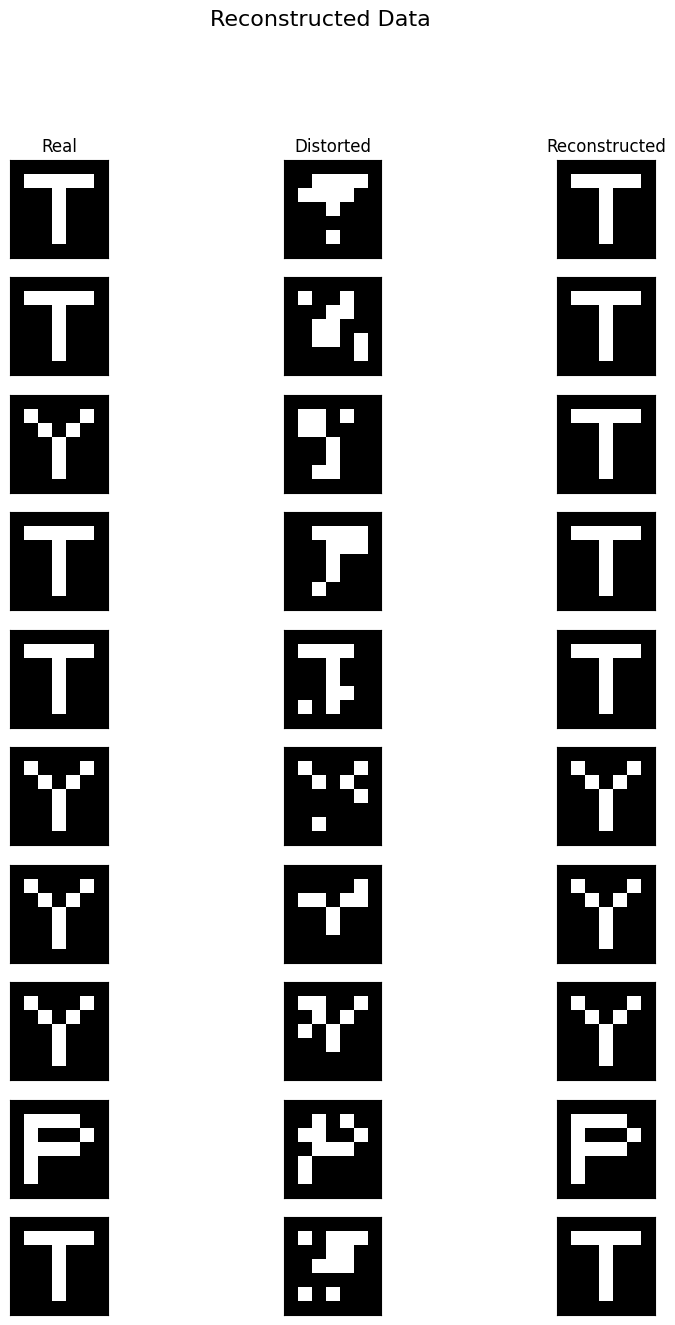

In [49]:
plot_images(op_imgs, "Reconstructed Data", n_train_disp)
plt.show()